# Project in Mahine Learning

Loading packages

In [1]:
from utility import *
from scipy.signal import savgol_filter

In [2]:
try :
    X1, X2, Y1 = open_data("C:\\Users\\Louis Lovat\\Desktop\\UNIF\\MachineLearning\\Project\\data")
except :
    X1, X2, Y1 = open_data("C:\\Users\\hchri\\Jupyter\\Machine learning\\project_data")
    
X2.drop(["title", "is_adult", "img_url", "description", "Unnamed: 0"], axis=1, inplace=True)
X1_p = X1.drop(["title", "is_adult", "img_url", "description", "Unnamed: 0"], axis=1)
colmns = ['ratings','n_votes','production_year','runtime','release_year']

# General preprocessing

X1_p = Binarize(X1_p, 'studio', 10)
X1_p = Binarize(X1_p, 'genres', 5)

X1_p = strToFloatArray(X1_p, "text_embeddings")
X1_p = strToFloatArray(X1_p, "img_embeddings")


In [3]:
mean_cst = 0
mean_line = 0
Linear = Process(X1_p, Y1)

for i in range(20):
    Linear.setTrainTest()
    Linear.X_train.fillna(Linear.X_train["runtime"].mean(), inplace=True)
    Linear.X_test.fillna(Linear.X_test["runtime"].mean(), inplace=True)
    
    ## Feature selection
    
    Linear.PCA_embeddings("text_embeddings", 100)
    Linear.PCA_embeddings("img_embeddings", 100)

    #Linear.emb_most_corr("text_embeddings")
    #Linear.emb_most_corr("img_embeddings")

    Linear.removeDuplicate()
    Linear.corrThreshold()
    
    # outliers ?
    
    ## regression
    
    Linear.addModel("linear")
    pred = Linear.useModel("linear")
    
    mean_cst += compute_rmse(float(Linear.Y_train.mean())*1e-6*np.ones(len(Linear.Y_test)), Linear.Y_test*1e-6)
    mean_line += compute_rmse(pred, Linear.Y_test*1e-6)
    print(str(i) + " lin_reg :", compute_rmse(pred, Linear.Y_test*1e-6))

print("\n avg cst :", mean_cst / 20)
print('avg lin_reg :', mean_line/20)

0 lin_reg : 59.137474902490986
1 lin_reg : 58.012123095736435
2 lin_reg : 58.75068492843233
3 lin_reg : 56.118254543292714
4 lin_reg : 53.104463202324006
5 lin_reg : 59.53821030112622
6 lin_reg : 55.6059737415561
7 lin_reg : 61.471207845572756
8 lin_reg : 67.04270558158711
9 lin_reg : 62.06614279697108
10 lin_reg : 58.51538808220679
11 lin_reg : 56.00695940958382
12 lin_reg : 57.989546317073454
13 lin_reg : 54.161536138170256
14 lin_reg : 61.46752327964345
15 lin_reg : 58.98907135702514
16 lin_reg : 65.10373143326801
17 lin_reg : 60.45533774087024
18 lin_reg : 58.15701518232661
19 lin_reg : 51.31532339518491

 avg cst : 73.28507117885279
avg lin_reg : 58.65043366372212


In [4]:
mean_cst = 0
mean_knn = 0
KNN = Process(X1_p, Y1)

for i in range(20):
    KNN.setTrainTest()
    KNN.X_train.fillna(KNN.X_train["runtime"].mean(), inplace=True)
    KNN.X_test.fillna(KNN.X_test["runtime"].mean(), inplace=True)

    ## Feature selection
    
    KNN.PCA_embeddings("text_embeddings", 100)
    KNN.PCA_embeddings("img_embeddings", 100)
    KNN.removeDuplicate()
    KNN.removeRedundantFeatures(threshold = 0.8)

    #Linear.emb_most_corr("text_embeddings")
    #Linear.emb_most_corr("img_embeddings")
    
    KNN.minmaxize(withOutliers = False) # outliers ?
    KNN.corrThreshold()
    
    
    ## regression
    
    KNN.addModel("knn", n_neighbors = 9, p=1, weights = "distance")
    pred = KNN.useModel("knn")
    
    mean_cst += compute_rmse(float(KNN.Y_train.mean())*1e-6*np.ones(len(KNN.Y_test)), KNN.Y_test*1e-6)
    mean_knn += compute_rmse(pred, KNN.Y_test*1e-6)
    print(str(i) + " knn_reg :", compute_rmse(pred, KNN.Y_test*1e-6))

print("\n avg cst :", mean_cst / 20)
print('avg knn_reg :', mean_knn/20)

0 knn_reg : 54.33279407403973
1 knn_reg : 61.96627801323913
2 knn_reg : 58.83516973259971
3 knn_reg : 53.19122167776893
4 knn_reg : 64.928458814459
5 knn_reg : 58.29650995461185
6 knn_reg : 51.261789710432225
7 knn_reg : 58.13322437725713
8 knn_reg : 70.28700443422848
9 knn_reg : 57.22867342332505
10 knn_reg : 50.24654346143765
11 knn_reg : 53.6481148883533
12 knn_reg : 58.29782650380052
13 knn_reg : 57.30015545180761
14 knn_reg : 59.307121576570154
15 knn_reg : 56.3116286041745
16 knn_reg : 60.32395203365073
17 knn_reg : 58.52682847927354
18 knn_reg : 63.2307033149553
19 knn_reg : 62.123611767099746

 avg cst : 73.16685464288133
avg knn_reg : 58.388880514654204


In [3]:
process = Process(X1_p, Y1)

In [6]:
#We determine here wich number of neighbors is optimal

first = 1
last = 30
N_neighbors = [i for i in range(first, last+1)]
N_iterations = 30
results = []
for iteration in range(N_iterations):
    process.setTrainTest()
    process.X_train.fillna(process.X_train["runtime"].mean(), inplace=True)
    process.X_test.fillna(process.X_test["runtime"].mean(), inplace=True)
    ## Feature selection
    process.PCA_embeddings("text_embeddings", 100)
    process.PCA_embeddings("img_embeddings", 100)
    process.removeDuplicate()
    process.removeRedundantFeatures(threshold = 0.8)
    process.corrThreshold()
    ## Feature processing
    process.minmaxize(withOutliers = False) # outliers ?

    for n_neighbors in N_neighbors:
        process.addModel("knn", n_neighbors = n_neighbors, p=2, weights = "uniform")
        pred = process.useModel("knn")
        
        if iteration == 0:
            results.append(compute_rmse(pred, process.Y_test*1e-6) / N_iterations)
        else :
            results[n_neighbors - first] += compute_rmse(pred, process.Y_test*1e-6) / N_iterations
    print("iteration %d DONE" % iteration, end="\r")

11


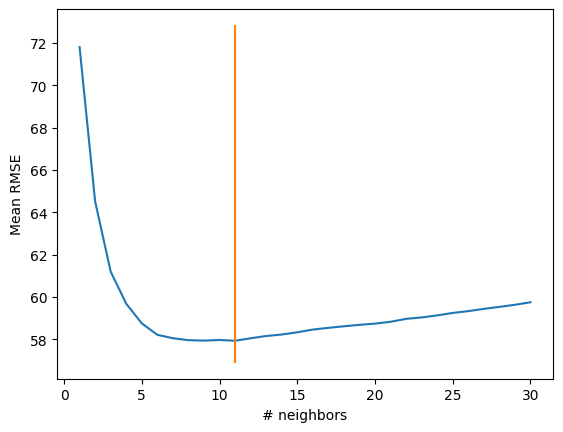

In [7]:
plt.plot(N_neighbors, results)
plt.plot([N_neighbors[np.argmin(results)], N_neighbors[np.argmin(results)]], [np.min(results)-1, np.max(results)+1])
print(N_neighbors[np.argmin(results)])
plt.ylabel("Mean RMSE")
plt.xlabel("# neighbors")
plt.show()

In [8]:
#We determine here wich minkowski metric is optimal

first = 1
last = 10
p_metrics = [i for i in range(first, last+1)]
N_iterations = 20
results = []
for iteration in range(N_iterations):
    process.setTrainTest()
    process.X_train.fillna(process.X_train["runtime"].mean(), inplace=True)
    process.X_test.fillna(process.X_test["runtime"].mean(), inplace=True)
    ## Feature selection
    process.PCA_embeddings("text_embeddings", 100)
    process.PCA_embeddings("img_embeddings", 100)
    process.removeDuplicate()
    process.removeRedundantFeatures(threshold = 0.8)
    process.corrThreshold()
    ## Feature processing
    process.minmaxize(withOutliers = False) # outliers ?

    for p in p_metrics:
        process.addModel("knn", n_neighbors = 9, p=p, weights = "uniform")
        pred = process.useModel("knn")
        
        if iteration == 0:
            results.append(compute_rmse(pred, process.Y_test*1e-6) / N_iterations)
        else :
            results[p - first] += compute_rmse(pred, process.Y_test*1e-6) / N_iterations
    print("iteration %d DONE" % iteration, end="\r")

1


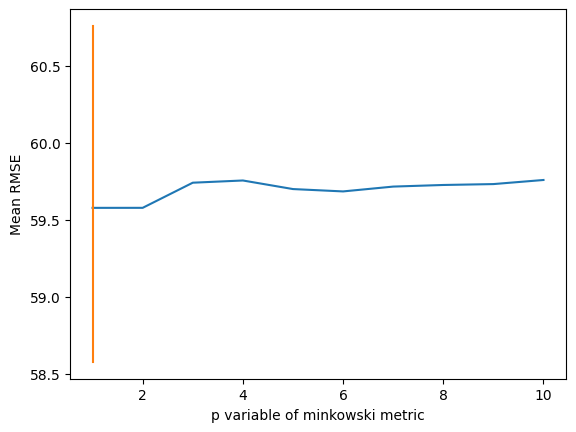

In [9]:
plt.plot(p_metrics, results)
plt.plot([p_metrics[np.argmin(results)], p_metrics[np.argmin(results)]], [np.min(results)-1, np.max(results)+1])
print(p_metrics[np.argmin(results)])
plt.ylabel("Mean RMSE")
plt.xlabel("p variable of minkowski metric")
plt.show()

In [10]:
#We determine here if we should keep the ouliers while scaling

first = 1
last = 2
outliers = [i for i in range(first, last+1)]
N_iterations = 20
results = []
for iteration in range(N_iterations):
    process.setTrainTest()
    for outlier in outliers:
        process.X_train.fillna(process.X_train["runtime"].mean(), inplace=True)
        process.X_test.fillna(process.X_test["runtime"].mean(), inplace=True)
        ## Feature selection
        process.PCA_embeddings("text_embeddings", 100)
        process.PCA_embeddings("img_embeddings", 100)
        process.removeDuplicate()
        process.removeRedundantFeatures(threshold = 0.8)
        process.corrThreshold()
        ## Feature processing
        arg = False
        if outlier == 1:
            arg = True
        process.minmaxize(withOutliers = arg) # outliers ?
        process.addModel("knn", n_neighbors = 9, p=1, weights = "uniform")
        pred = process.useModel("knn")
        process.resetProcessing()
        if iteration == 0:
            results.append(compute_rmse(pred, process.Y_test*1e-6) / N_iterations)
        else :
            results[outlier - first] += compute_rmse(pred, process.Y_test*1e-6) / N_iterations
    print("iteration %d DONE" % iteration, end="\r")

2


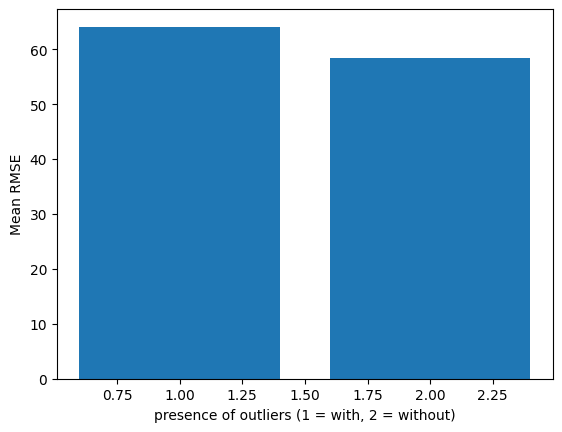

In [11]:
plt.bar(outliers, results)
print(outliers[np.argmin(results)])
plt.ylabel("Mean RMSE")
plt.xlabel("presence of outliers (1 = with, 2 = without)")
plt.show()

In [12]:
#We determine here if we should keep the ouliers 

first = 1
last = 2
outliers = [i for i in range(first, last+1)]
N_iterations = 20
results = []
for iteration in range(N_iterations):
    process.setTrainTest()
    for outlier in outliers:
        process.X_train.fillna(process.X_train["runtime"].mean(), inplace=True)
        process.X_test.fillna(process.X_test["runtime"].mean(), inplace=True)
        ## Feature selection
        process.PCA_embeddings("text_embeddings", 100)
        process.PCA_embeddings("img_embeddings", 100)
        process.removeDuplicate()
        if outlier == 1:
            process.removeOutliers(colmns)
        process.removeRedundantFeatures(threshold = 0.8)
        process.corrThreshold()
        ## Feature processing
        process.minmaxize(withOutliers = False) # outliers ?
        process.addModel("knn", n_neighbors = 9, p=1, weights = "uniform")
        pred = process.useModel("knn")
        process.resetProcessing()
        if iteration == 0:
            results.append(compute_rmse(pred, process.Y_test*1e-6) / N_iterations)
        else :
            results[outlier - first] += compute_rmse(pred, process.Y_test*1e-6) / N_iterations
    print("iteration %d DONE" % iteration, end="\r")

2


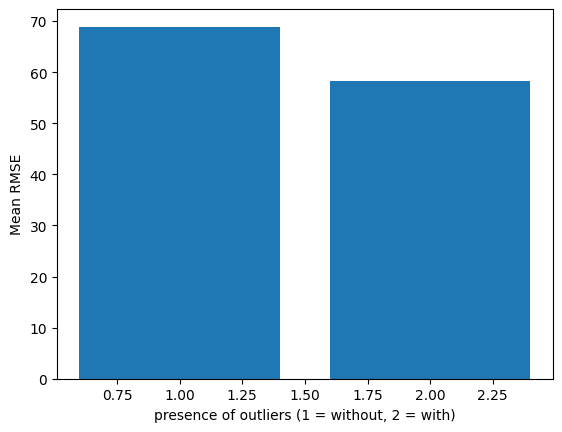

In [13]:
plt.bar(outliers, results)
print(outliers[np.argmin(results)])
plt.ylabel("Mean RMSE")
plt.xlabel("presence of outliers (1 = without, 2 = with)")
plt.show()

In [16]:
mean_cst = 0
mean_rf = 0
RF = Process(X1_p, Y1)

for i in range(20):
    RF.setTrainTest()
    RF.X_train.fillna(RF.X_train["runtime"].mean(), inplace=True)
    RF.X_test.fillna(RF.X_test["runtime"].mean(), inplace=True)

    ## Feature selection
    
    RF.PCA_embeddings("text_embeddings", 100)
    RF.PCA_embeddings("img_embeddings", 100)
    RF.removeDuplicate()
    RF.removeRedundantFeatures(threshold = 0.8)

    #Linear.emb_most_corr("text_embeddings")
    #Linear.emb_most_corr("img_embeddings")
    
    RF.minmaxize(withOutliers = False) # outliers ?
    RF.corrThreshold()
    
    
    ## regression
    RF.addModel("randomForest", n_estimators = 90)
    pred = RF.useModel("randomForest")
    
    mean_cst += compute_rmse(float(RF.Y_train.mean())*1e-6*np.ones(len(RF.Y_test)), RF.Y_test*1e-6)
    mean_rf += compute_rmse(pred, RF.Y_test*1e-6)
    print(str(i) + " rf_reg :", compute_rmse(pred, RF.Y_test*1e-6))

print("\n avg cst :", mean_cst / 20)
print('avg rf_reg :', mean_rf/20)

0 rf_reg : 59.01043170889238
1 rf_reg : 58.6625305509744
2 rf_reg : 50.716646039049984
3 rf_reg : 53.49058791664133
4 rf_reg : 62.07409245360889
5 rf_reg : 58.13979463300693
6 rf_reg : 55.82782813381308
7 rf_reg : 51.11335392809191
8 rf_reg : 62.763401685446766
9 rf_reg : 52.265499480663415
10 rf_reg : 63.21045731829528
11 rf_reg : 50.02576813046249
12 rf_reg : 57.05455767517856
13 rf_reg : 56.67518882828097
14 rf_reg : 53.57793600167145
15 rf_reg : 57.0836754912137
16 rf_reg : 56.84448239963935
17 rf_reg : 57.696904186113784
18 rf_reg : 56.95746793849946
19 rf_reg : 52.98242966883022

 avg cst : 72.47813190437842
avg rf_reg : 56.30865170841871


In [6]:
#We determine here an optimal number of trees

first = 50
last = 150
step = 10
N_estimators = [i for i in range(first, last + step, step)]
N_iterations = 20
results = []
for iteration in range(N_iterations):
    process.setTrainTest()
    for n_estimators in N_estimators:
        process.X_train.fillna(process.X_train["runtime"].mean(), inplace=True)
        process.X_test.fillna(process.X_test["runtime"].mean(), inplace=True)
        ## Feature selection
        process.PCA_embeddings("text_embeddings", 100)
        process.PCA_embeddings("img_embeddings", 100)
        process.removeDuplicate()
        process.removeRedundantFeatures(threshold = 0.8)
        process.corrThreshold()
        ## Feature processing
        process.minmaxize(withOutliers = False) # outliers ?
        process.addModel("randomForest", n_estimators = n_estimators)
        pred = process.useModel("randomForest")
        process.resetProcessing()
        if iteration == 0:
            results.append(compute_rmse(pred, process.Y_test*1e-6) / N_iterations)
        else :
            results[(n_estimators - first) // step] += compute_rmse(pred, process.Y_test*1e-6) / N_iterations
    print("iteration %d DONE" % iteration, end="\r")

90


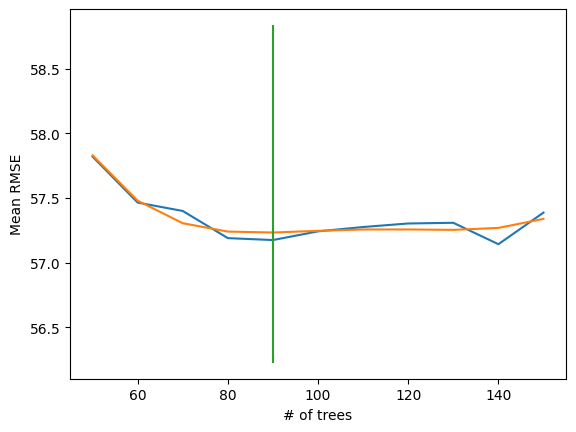

In [15]:
plt.plot(N_estimators, results)
filtered = savgol_filter(results, window_length=len(results), polyorder=4)
plt.plot(N_estimators, filtered)
plt.plot([N_estimators[np.argmin(filtered)], N_estimators[np.argmin(filtered)]], [np.min(filtered)-1, np.max(filtered)+1])
print(N_estimators[np.argmin(filtered)])
plt.ylabel("Mean RMSE")
plt.xlabel("# of trees")
plt.show()